WEB SCRAPING AND ANALYSIS

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...


In [4]:
df

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...
...,...
995,✅ Trip Verified | London to Seville. Followin...
996,✅ Trip Verified | Doha to Paris via London. T...
997,✅ Trip Verified | Madrid to London BA0457 on ...
998,"✅ Trip Verified | On the flight to Tokyo, I wa..."


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,The flight was comfortable enough but with a...
1,We had a really good flying experience with ...
2,Waited an hour to check-in at the Paphos bus...
3,"Not a great experience at all, from the out..."
4,Boarding was difficult caused by vast majori...
...,...
995,London to Seville. Following on from mistake...
996,Doha to Paris via London. This is the first ...
997,Madrid to London BA0457 on the 18/03. Couldn...
998,"On the flight to Tokyo, I was separated from ..."


In [6]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,The flight was comfortable enough but with a...,The flight was comfortable enough but with an...
1,We had a really good flying experience with ...,We had a really good flying experience with B...
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...
3,"Not a great experience at all, from the out...",Not a great experience at all from the outset...
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...


In [7]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...


In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,The flight was comfortable enough but with a...,The flight was comfortable enough but with an...,"[(flight, n), (comfortable, a), (enough, r), (..."
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie..."
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ..."
3,"Not a great experience at all, from the out...",Not a great experience at all from the outset...,"[(great, a), (experience, n), (outset, n), (po..."
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The flight was comfortable enough but with a...,The flight was comfortable enough but with an...,"[(flight, n), (comfortable, a), (enough, r), (...",flight comfortable enough hour delay return ...
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie...",really good fly experience BA travel young f...
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ...",Waited hour check Paphos business check Staf...
3,"Not a great experience at all, from the out...",Not a great experience at all from the outset...,"[(great, a), (experience, n), (outset, n), (po...",great experience outset poorly manage bus us...
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...


In [10]:
df[['reviews','Lemma']]

,reviews,Lemma
0,The flight was comfortable enough but with a...,flight comfortable enough hour delay return ...
1,We had a really good flying experience with ...,really good fly experience BA travel young f...
2,Waited an hour to check-in at the Paphos bus...,Waited hour check Paphos business check Staf...
3,"Not a great experience at all, from the out...",great experience outset poorly manage bus us...
4,Boarding was difficult caused by vast majori...,Boarding difficult cause vast majority passe...
...,...,...
995,London to Seville. Following on from mistake...,London Seville Following mistakenly book ret...
996,Doha to Paris via London. This is the first ...,Doha Paris via London first time use BA sinc...
997,Madrid to London BA0457 on the 18/03. Couldn...,Madrid London BA good service Long time sinc...
998,"On the flight to Tokyo, I was separated from ...",flight Tokyo separate wife even though honey...


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The flight was comfortable enough but with a...,The flight was comfortable enough but with an...,"[(flight, n), (comfortable, a), (enough, r), (...",flight comfortable enough hour delay return ...,0.2960,Neutral
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie...",really good fly experience BA travel young f...,0.9788,Positive
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ...",Waited hour check Paphos business check Staf...,-0.8101,Negative
3,"Not a great experience at all, from the out...",Not a great experience at all from the outset...,"[(great, a), (experience, n), (outset, n), (po...",great experience outset poorly manage bus us...,0.7003,Positive
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...,0.9343,Positive


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    412
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x240ab6dd840>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

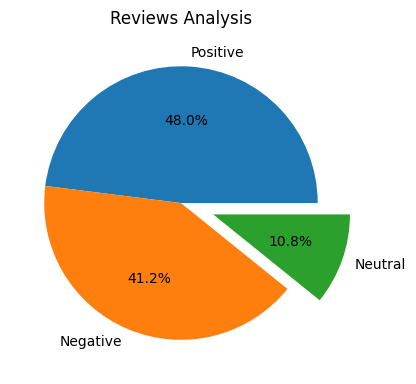

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("BA_reviews.csv")

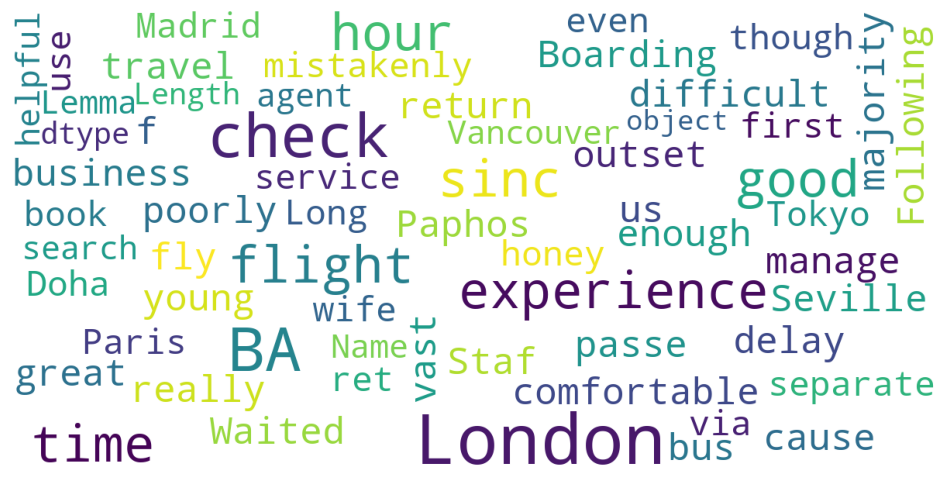

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)